In [1]:
# IMPORT PANDAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv") # READ THE DATASET
df = pd.DataFrame(df)

In [2]:
# WORKING ON OMAN
df_countries = df.groupby(df["Country"])

# OMAN
df_oman = df_countries.get_group("Oman")
df_oman = df_oman.reset_index(drop = True)
df_oman = df_oman['Cumulative_cases']
df_oman = pd.DataFrame(df_oman)

In [3]:
#NORMALIZATION

pop_o = 5107000

df_oman["Cumulative_cases_norm"] = df_oman["Cumulative_cases"]/pop_o

In [4]:
oman = df_oman

In [5]:
i = 0
while i < 103:
    oman = oman.drop(oman.index[0])
    i = i + 1

oman = oman.reset_index(drop = True)

In [6]:
oman["Cumulative_cases_norm"] = oman["Cumulative_cases"]/pop_o

oman["log"] = np.log(oman["Cumulative_cases_norm"])

# OMAN

**log P = c + rt -------------------1**

The First wave of Oman is 0-338 (in days). Each wave will have an exponential growth and logistic growth. The exponential growth is the high point of the wave where the cases are rising exponentially and rapidly. The logistic is the end part of the wave, where the cases are seemingly slowed down and it means the end of the first wave altogether. There may be multiple exponential and logistics growths within a wave.

Now from the graphs above, we know that

c = -8.63267

t = 338

log(P) = -3.533515 (from the log return graph at t = 338)

From 1,

r = (-3.533515 + 8.63267)/338

r = 0.0150862

In [7]:
r = 0.0150862
from scipy.integrate import odeint

# Total population, n
n = pop_o
# Initial number of infected and recovered individuals, i_0 and r_0
i_0 = oman["Cumulative_cases_norm"][0]
r_0 = 0

# beginning of the period s_0
s_0 = 1 - i_0 - r_0

In [8]:
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b

In [9]:
t = np.linspace(0, 338, 338)
# The SIR model differential equations.
def deriv(y, t, a, b):
    S, I, R = y
    dSdt = - a * S * I
    dIdt = a * (S * I) - (b * I)
    dRdt = b * I
    return dSdt, dIdt, dRdt

y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

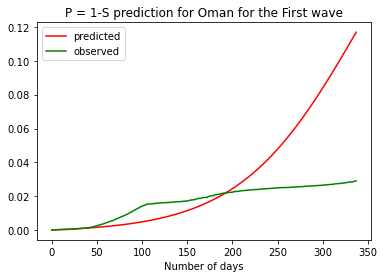

In [11]:
s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
oman['Cumulative_cases_norm'][:338].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Oman for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()